<a href="https://colab.research.google.com/github/Do-Nhat-Truong/AI-VietNam-Module4-week2/blob/main/Week2_BT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
#print(y)

In [109]:
!gdown 1lN8LdQjy-L_0UJt359I_cuZkOLl0qDx0

Downloading...
From: https://drive.google.com/uc?id=1lN8LdQjy-L_0UJt359I_cuZkOLl0qDx0
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 16.2MB/s]


In [110]:
data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)
N = data.shape[0]
X = data[:,:3]
y = data[:,3:]
print(data.shape)

(200, 4)


In [111]:
def mean_normalization(X):
  N = len(X)
  maxi = np.max(X)
  mini = np.min(X)
  avg = np.mean(X)
  X = (X-avg) / (maxi-mini)
  X_b = np.c_[np.ones((N, 1)), X]
  return X_b, maxi, mini, avg

X_b, maxi, mini, avg = mean_normalization(X)
print(X_b.shape)



(200, 4)


In [112]:
def predict ( xi , thetas):
  y_hat = xi.dot(thetas)
  return y_hat

def compute_loss_mse( y , y_hat ):
    loss = ((y_hat-y)**2)/2
    return loss

def gradient(xi,grad):
    dtheta = xi.T.dot(grad)
    return dtheta

def update_theta ( thetas,loss_grad , lr ) :
    w = thetas - lr * loss_grad
    return w

def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):

  # thetas = np.random.randn(4, 1) # uncomment this line for real application
  thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])

  thetas_path = [thetas]
  losses = []

  for epoch in range(n_epochs):
    for i in range(N):
      # select random number in N
      # random_index = np.random.randint(N)
      #In real application, you should use this code
      random_index = i
      # This code is used for this assignment only
      xi = X_b[random_index:random_index+1]
      yi = y[random_index:random_index+1]


      # Compute output
      y_hat = predict(xi, thetas)


      # Compute loss li
      loss = compute_loss_mse( y=yi,y_hat=y_hat)


      # Compute gradient for loss
      loss_grad=y_hat-yi

      # save loss
      #losses.append(loss)
      losses.append(loss[0][0])




      # Compute gradient
      # *******Your code here ********
      grad = gradient(xi,grad=loss_grad)
      # update theta
      # *******Your code here ********
      thetas =update_theta(thetas,grad,learning_rate)
      # save thetas
      thetas_path.append(thetas)
      # logging
      # *******Your code here ********
  return thetas_path, losses



[231.6279340126778, 41.57977069848821, 55.195151558496725, 116.41375522732164, 139.416870240043, 13.818162614137577, 50.264560288753074, 66.411203534187, 4.071010719436172, 97.99934335521762, 55.71945078097033, 119.52151576123394, 22.24092637560631, 64.59834235463735, 137.67672990701791, 194.3792102178984, 44.772526196833745, 231.27298135435674, 32.42865831823542, 63.81100691611801, 106.20930253763431, 97.74627563117265, 1.7381637398752774, 139.9196715615363, 16.733211579264427, 84.17892173134933, 58.08475993675062, 136.50250269329587, 101.54622454879421, 17.605885231575424, 134.89501045115165, 24.641821952168744, 34.60160628135653, 72.62447222508321, 23.042493338433673, 74.20171186553097, 190.78925133266415, 41.540455399922536, 10.428964979663135, 117.78092460971673, 53.721160845800775, 58.32733738465501, 95.92247747749724, 62.99128919551302, 2.862097560982084, 43.79249159531667, 8.549632928814594, 127.70101108385958, 78.21687343739148, 4.466184251981253, 40.93124981144144, 6.71898486

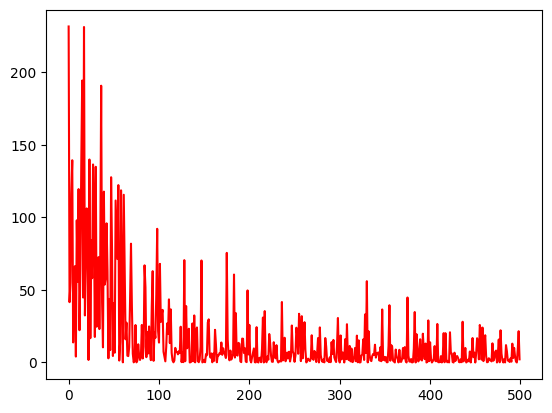

In [113]:
#import matplotlib.pyplot as plt
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01 )
x_axis = list(range(500))
# print(losses[:500])
x_axis = list(range(500))
#x_axis
# losses = np.array(losses).reshape(-1)
print(losses)
plt.plot(x_axis, losses[:500], color="r")
plt.show()

In [114]:
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=1, learning_rate=0.01 )
print(round(np.sum(losses),2))

6754.64


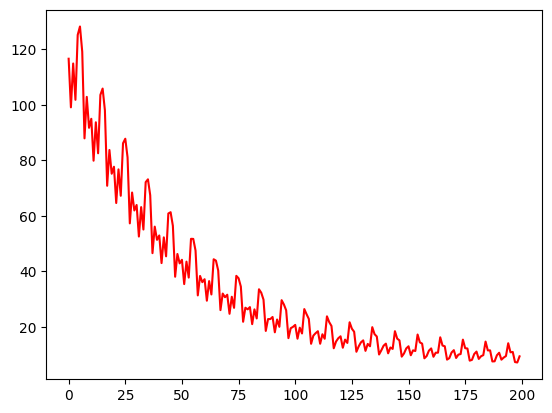

In [115]:
def mini_batch_gradient_descent ( X_b , y , n_epochs =50 , minibatch_size =20 , learning_rate =0.01):
  thetas = np.asarray ([[1.16270837] , [ -0.81960489] , [1.39501033] ,[0.29763545]])
  thetas_path = [thetas]
  losses = []
  for epoch in range ( n_epochs ) :
    shuffled_indices = np . asarray ([21 , 144 , 17 , 107 , 37 , 115 , 167 , 31 , 3 ,132 , 179 , 155 , 36 , 191 , 182 , 170 , 27 , 35 , 162 , 25 , 28 , 73 , 172 , 152 , 102 , 16 ,
185 , 11 , 1 , 34 , 177 , 29 , 96 , 22 , 76 , 196 , 6 , 128 , 114 , 117 , 111 , 43 , 57 , 126 ,165 , 78 , 151 , 104 , 110 , 53 , 181 , 113 , 173 , 75 , 23 , 161 , 85 , 94 , 18 , 148 , 190 ,
169 , 149 , 79 , 138 , 20 , 108 , 137 , 93 , 192 , 198 , 153 , 4 , 45 , 164 , 26 , 8 , 131 ,77 , 80 , 130 , 127 , 125 , 61 , 10 , 175 , 143 , 87 , 33 , 50 , 54 , 97 , 9 , 84 , 188 , 139 ,
195 , 72 , 64 , 194 , 44 , 109 , 112 , 60 , 86 , 90 , 140 , 171 , 59 , 199 , 105 , 41 , 147 ,92 , 52 , 124 , 71 , 197 , 163 , 98 , 189 , 103 , 51 , 39 , 180 , 74 , 145 , 118 , 38 , 47 ,
174 , 100 , 184 , 183 , 160 , 69 , 91 , 82 , 42 , 89 , 81 , 186 , 136 , 63 , 157 , 46 , 67 ,129 , 120 , 116 , 32 , 19 , 187 , 70 , 141 , 146 , 15 , 58 , 119 , 12 , 95 , 0 , 40 , 83 , 24 ,
168 , 150 , 178 , 49 , 159 , 7 , 193 , 48 , 30 , 14 , 121 , 5 , 142 , 65 , 176 , 101 , 55 ,133 , 13 , 106 , 66 , 99 , 68 , 135 , 158 , 88 , 62 , 166 , 156 , 2 , 134 , 56 , 123 , 122 ,
154])
    X_b_shuffled = X_b [shuffled_indices]
    y_shuffled = y [shuffled_indices]
    for i in range (0 , N , minibatch_size ):
      xi = X_b_shuffled [ i : i + minibatch_size]
      yi = y_shuffled [ i: i + minibatch_size ]

      # compute output
      y_hat = predict ( xi , thetas )

      # compute loss
      loss = compute_loss_mse ( y=yi , y_hat=y_hat )


      # compute derivative of loss
      loss_grad = (y_hat - yi)/minibatch_size

      # compute gradient
      grad = gradient ( xi , loss_grad )

      # update theta
      thetas = update_theta( thetas , grad , learning_rate )

      thetas_path.append ( thetas )
      loss_mean = np.sum( loss ) / minibatch_size
      losses.append(loss_mean )
  return thetas_path , losses
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50,  minibatch_size = 20, learning_rate=0.01)

x_axis = list(range(200))
plt.plot(x_axis,losses[:200], color="r")
plt.show()


In [116]:
mbgd_thetas , losses = mini_batch_gradient_descent ( X_b , y , n_epochs =50 ,minibatch_size = 20 , learning_rate =0.01)
print ( round ( sum( losses ) ,2) )

8865.65


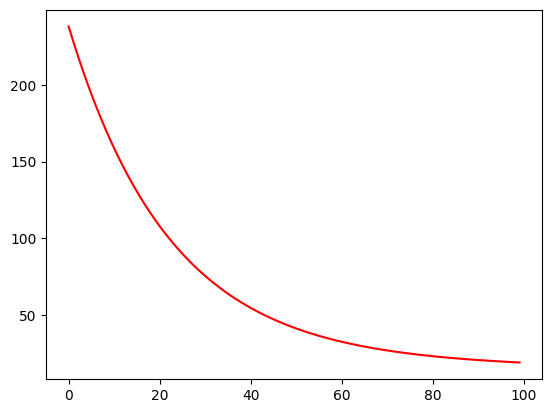

In [117]:
def batch_gradient_descent ( X_b , y , n_epochs =100 , learning_rate =0.01) :
  # thetas = np. random . randn (4 , 1) # uncomment this line for real application
  thetas = np . asarray ([[1.16270837] , [ -0.81960489] , [1.39501033] ,[0.29763545]])
  thetas_path = [thetas]
  losses = []
  for epoch in range ( n_epochs ) :

    # compute output
    y_hat = predict ( X_b , thetas )

    # compute loss
    loss = (y_hat - y)**2
    #loss = compute_loss_mse ( y=y , y_hat=y_hat
    # Compute losss ’s derivative
    loss_grad =2* (y_hat - y)/N

    # compute gradient
    grad = gradient ( X_b , loss_grad )

    # update theta

    thetas = update_theta ( thetas , grad , learning_rate )

    mean_loss = np.sum( loss ) / N
    losses.append ( mean_loss )



  return thetas_path , losses

bgd_thetas , losses = batch_gradient_descent ( X_b , y , n_epochs =100 , learning_rate=0.01)


x_axis = list ( range (100) )
plt.plot ( x_axis , losses [:100] , color ="r")
plt.show ()


In [118]:

bgd_thetas, losses = batch_gradient_descent ( X_b , y , n_epochs =100 , learning_rate=0.01)
# bgd_thetas2 , losses2 = batch_gradient_descent2 ( X_b , y , n_epochs =100 , learning_rate=0.01)
# print(round(sum(losses2),2))
print(round(sum(losses) ,2) )

6716.46
